<a href="https://colab.research.google.com/github/seyeonjungGit/P_Project_YOUTUBE_Analysis/blob/main/Youtube_Analysis(Q1_(5)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설치 & 기본설정

matplotlib 폰트 설치
- 설치 후 런타임 재시작

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 설정 변환을 위해서 matplotlib만 import
import matplotlib as mpl
import warnings

# Windows
mpl.rc("font", family='NanumBarunGothic')

# 폰트변경 후 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

# 화질설정
%config InlineBackend.figure_format='retina'

warnings.filterwarnings("ignore")
%matplotlib inline

프로파일링 설치

In [ ]:
# pip install -U pandas-profiling

In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df_origin = pd.read_csv('/content/drive/MyDrive/preon_nlp/기업과제자료/pretest_data.csv')
df_origin.head(3)

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341


In [ ]:
df_origin.shape

(2644, 25)

In [ ]:
df_origin.duplicated().sum()

0

중복데이터는 없음

In [ ]:
df_origin.isnull().sum()

video_id                      0
channel_id                    0
published_date                0
category_name                 0
duration                      0
tags                        370
description                  40
on_trending_date              0
off_trending_date             0
on_rank                       0
off_rank                      0
on_views                      0
off_views                     0
on_likes                      0
off_likes                     0
on_dislikes                   0
off_dislikes                  0
on_comments                   0
off_comments                  0
on_channel_subscribers        0
off_channel_subscribers       0
on_channel_total_views        0
off_channel_total_views       0
on_channel_total_videos       0
off_channel_total_videos      0
dtype: int64

결측치는 tags와 description에 분포

- tags                        370
- description                  40

In [ ]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   video_id                  2644 non-null   object
 1   channel_id                2644 non-null   object
 2   published_date            2644 non-null   object
 3   category_name             2644 non-null   object
 4   duration                  2644 non-null   object
 5   tags                      2274 non-null   object
 6   description               2604 non-null   object
 7   on_trending_date          2644 non-null   object
 8   off_trending_date         2644 non-null   object
 9   on_rank                   2644 non-null   int64 
 10  off_rank                  2644 non-null   int64 
 11  on_views                  2644 non-null   int64 
 12  off_views                 2644 non-null   int64 
 13  on_likes                  2644 non-null   int64 
 14  off_likes               

2644row와 25columns, object와 int 형이 있음.

## 판다스 프로파일링

In [ ]:
# from pandas_profiling import ProfileReport
# profile=df.profile_report() 
# profile.to_file('./Youtube_report1.html') 

## 전처리(형변환)

In [ ]:
df_origin.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos'],
      dtype='object')

In [ ]:
import copy

# 원본 보존(dataframe은 mutable한 객체이므로 복제를 위해 deepcopy(깊은복사) 이용)
df = copy.deepcopy(df_origin)

In [ ]:
from datetime import date

# 이후 편의를 위해 날짜형 데이터로 형변환
df['published_date'] = pd.to_datetime(df['published_date'])
df['on_trending_date'] = pd.to_datetime(df['on_trending_date'])
df['off_trending_date'] = pd.to_datetime(df['off_trending_date'])

In [ ]:
# 형변환 확인
df.dtypes

video_id                            object
channel_id                          object
published_date              datetime64[ns]
category_name                       object
duration                            object
tags                                object
description                         object
on_trending_date            datetime64[ns]
off_trending_date           datetime64[ns]
on_rank                              int64
off_rank                             int64
on_views                             int64
off_views                            int64
on_likes                             int64
off_likes                            int64
on_dislikes                          int64
off_dislikes                         int64
on_comments                          int64
off_comments                         int64
on_channel_subscribers               int64
off_channel_subscribers              int64
on_channel_total_views               int64
off_channel_total_views              int64
on_channel_

## summary statistics

In [ ]:
# Numeric data에 대한 통계 확인 (datetime형 포함)
df.describe(datetime_is_numeric=True)

,published_date,on_trending_date,off_trending_date,on_rank,off_rank,on_views,off_views,on_likes,off_likes,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
count,2644,2644,2644,2644.000000,2644.000000,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2644.000000,2644.000000,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2644.000000,2644.000000
mean,2021-05-27 14:13:58.729198336,2021-05-29 15:45:28.593040896,2021-05-30 23:40:23.600605184,20.234493,35.795386,9.534819e+05,1.432732e+06,5.465813e+04,6.845384e+04,534.279879,860.402421,9.032085e+03,1.111202e+04,1.742059e+06,1.748095e+06,8.639525e+08,8.665469e+08,9276.285174,9229.746596
min,2021-03-25 00:00:00,2021-03-27 00:00:00,2021-04-01 00:00:00,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.531600e+04,5.531600e+04,1.000000,1.000000
25%,2021-04-27 00:00:00,2021-04-29 00:00:00,2021-04-30 00:00:00,9.000000,28.000000,2.353520e+05,3.068540e+05,4.208500e+03,4.932750e+03,86.000000,108.000000,5.110000e+02,5.977500e+02,1.480000e+05,1.507500e+05,3.698228e+07,3.780661e+07,118.000000,118.000000
50%,2021-05-28 00:00:00,2021-05-30 00:00:00,2021-05-31 00:00:00,19.000000,37.000000,4.279245e+05,5.715080e+05,7.851000e+03,9.507000e+03,159.000000,211.000000,1.157000e+03,1.311500e+03,4.670000e+05,4.695000e+05,1.215355e+08,1.223838e+08,326.500000,327.500000
75%,2021-06-27 00:00:00,2021-06-29 00:00:00,2021-07-01 00:00:00,30.000000,45.000000,8.268800e+05,1.119499e+06,1.688350e+04,2.085950e+04,315.000000,435.000000,2.720000e+03,3.150750e+03,1.272500e+06,1.282500e+06,4.857386e+08,4.878799e+08,1245.250000,1244.500000
max,2021-07-29 00:00:00,2021-07-31 00:00:00,2021-07-31 00:00:00,50.000000,50.000000,9.727667e+07,2.488763e+08,8.097173e+06,1.575992e+07,37349.000000,133721.000000,4.625133e+06,6.659938e+06,5.890000e+07,5.940000e+07,2.170125e+10,2.170568e+10,545577.000000,545764.000000
std,NaN,NaN,NaN,12.833115,10.376753,3.200375e+06,6.836354e+06,3.239337e+05,4.983217e+05,2070.643487,4754.238395,1.155321e+05,1.574601e+05,5.546694e+06,5.569829e+06,2.511740e+09,2.518026e+09,43156.370481,43100.803783


3월월 말부터 7월말까지의 데이터이며,

1위부터 50위까지의 인기동영상 데이터입니다.

In [ ]:
# categorical data에 대한 통계 -> 관측값 개수와 유일값개수, 최빈값, 최빈값의 빈도수.
df.describe(include=[object])  

,video_id,channel_id,category_name,duration,tags,description
count,2644,2644,2644,2644,2274,2604
unique,2643,940,15,1200,1978,2492
top,VBSBm,CHQ2O-i,Entertainment,PT8M1S,파뿌리|예능|게임|GAME|오락|버라이어티|variety|웹예능|플레이,Connect with BTS: https://ibighit.com/bts http...
freq,2,17,954,17,14,10


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# 그래프사이즈와 글꼴사이즈
sns.set(rc = {'figure.figsize':(18,13)})
sns.set(font_scale=1.5)

plt.figure(figsize=(10,8))


# 한글깨짐 및 마이너스 오류 수정
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

<Figure size 720x576 with 0 Axes>

In [ ]:
# 카테고리별 유일값 개수세기. 

category_count = df['category_name'].value_counts(ascending=True).reset_index()\
    .rename(columns = {'index':'categoty_name', 'category_name':'count'})
category_count

,categoty_name,count
0,Nonprofits & Activism,1
1,Travel & Events,23
2,Autos & Vehicles,31
3,Science & Technology,36
4,Education,65
5,Pets & Animals,65
6,Film & Animation,74
7,Gaming,80
8,Howto & Style,119
9,News & Politics,162


In [ ]:
category_count = df['category_name'].value_counts().reset_index()\
    .rename(columns = {'index':'categoty_name', 'category_name':'count'})

In [ ]:
category = category_count['categoty_name'].tolist()
category

['Entertainment',
 'People & Blogs',
 'Music',
 'Sports',
 'Comedy',
 'News & Politics',
 'Howto & Style',
 'Gaming',
 'Film & Animation',
 'Education',
 'Pets & Animals',
 'Science & Technology',
 'Autos & Vehicles',
 'Travel & Events',
 'Nonprofits & Activism']

# Q1.데이터타입별 시각화

## 5) 월별 카테고리별 태그 키워드 순위

- 태그키워드는 월별로 어떻게 변화하였는가.

In [ ]:
# 필요한 컬럼만 추출
tag_df = df[['published_date','category_name','tags']]
print(tag_df.shape)
tag_df.isnull().sum()

(2644, 3)


published_date      0
category_name       0
tags              370
dtype: int64

In [ ]:
# 결측치 제거
tag_df.dropna(inplace=True)

In [ ]:
print(tag_df.shape)
tag_df.isnull().sum()

(2274, 3)


published_date    0
category_name     0
tags              0
dtype: int64

In [ ]:
# 리스트가 들어오면 특수문자 및 공백을 제거한 리스트를 return하는 함수
import re

def text(lis):
  li = []
  for i in lis:
    li.append(re.sub(r"[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\s]","",i))
  return li

In [ ]:
tag_df['published_month'] = tag_df['published_date'].apply(lambda x: x.month)  # 월 추출
tag_df['tag_name'] =tag_df['tags'].apply(lambda x: x.split('|'))  # 태그 추출 

# 특수문자 및 공백 제거
tag_df['tag_name1']= tag_df['tag_name'].apply(lambda x: text(x))
tag_df.reset_index(drop=True, inplace=True)

In [ ]:
tag_df1 = tag_df[['published_month', 'category_name', 'tag_name1']]

In [ ]:
tag_df1

,published_month,category_name,tag_name1
0,7,Entertainment,"[SiriusXM, SiriusXM, Sirius, SXM, BIGHIT, 빅히트,..."
1,6,Entertainment,"[치킨불냉면, 치킨, 불냉면, 냉면]"
2,6,Sports,"[NewsNetwork, SBSSPORTSMUG, SPORTSMUG, 스포츠머그, ..."
3,7,Sports,"[이천수, 심판도전기, 축구심판]"
4,6,Music,"[JYPEntertainment, JYP, 2PM, 투피엠, 2PMTeaserVid..."
...,...,...,...
2269,5,Comedy,"[아프리카tv, 봉준, 와꾸대장봉준, BJ, 컨텐츠, 클립]"
2270,7,Comedy,"[장삐쭈, 삐쭈, ㅋㅋㅋ, 삐쮸, 장삐쮸, 병맛더빙, 더빙, 웃긴동영상, 꿀잼, 신..."
2271,4,Science & Technology,"[아이패드프로, 아이패드프로5, 아이패드프로5세대, 신형아이맥, 아이맥, iMac,..."
2272,4,Entertainment,"[고요속의외침, 뽕숭아학당, 슬기로운캠핑생활, 아는형님, 미스터트롯, 임영웅, 영탁..."


결측치를 제거하고, tag 컬럼을 splitg하였습니다. 띄워쓰기와 특수문자 처리를 마친 tag_df1 데이터프레임에 대해 조작해봅니다. 

태그 키워드의 횟수 및 통계를 추출하기 위한 함수를 선언합니다. 

In [ ]:
from collections import Counter

def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

### 3월

In [ ]:
tag3 = tag_df1[tag_df1['published_month']==3]
tag3

,published_month,category_name,tag_name1
139,3,Entertainment,"[아이유, 아이유신곡, 아이유코인, 아이유라일락, 코인, 라일락, 아이유노래, 아이..."
140,3,People & Blogs,"[강철부대, 특수부대, 육군특수전사령부, 특전사, UDT해군특수전전단, UDT, 제..."
167,3,News & Politics,"[MBN, 박수홍, 오열, 다홍이, 뉴스파이터, 김명준앵커, SNS, 가족, 경험,..."
197,3,Entertainment,"[런닝맨, 김종국, 이광수, 지석진, 유재석, 하하, 송지효, 전소민, 양세찬, r..."
202,3,Comedy,"[깨방정, 정승빈, 몰카, 미녀, 개그맨, 존잘남, 존예녀, 디스코, 깨방정디스코,..."
...,...,...,...
2120,3,People & Blogs,"[이수날, 정이수, 경희대구너, 경희대구너, 슛포러브, 연애배치고사, 임형철, 아다..."
2133,3,Music,"[딩고뮤직, dingo, dingomusic, music, kpop, live, 멜..."
2152,3,Music,"[Kpop, girlgroup, 1theK, Starshiptv, starship,..."
2188,3,People & Blogs,"[지편한세상, 왕코, 연예인, runningman, 런닝맨, 왕코형, jeeseok..."


3월달 중에서 카테고리별로 구분하여, 태그 키워드의 등장순위를 매겨보겠습니다.

In [ ]:
category

['Entertainment',
 'People & Blogs',
 'Music',
 'Sports',
 'Comedy',
 'News & Politics',
 'Howto & Style',
 'Gaming',
 'Film & Animation',
 'Education',
 'Pets & Animals',
 'Science & Technology',
 'Autos & Vehicles',
 'Travel & Events',
 'Nonprofits & Activism']

In [ ]:
month3_wc = category.copy()
month3_wc_sort = category.copy()

In [ ]:
# category_name에 따라 분류해서 태그의 통계적 정보가 담긴 데이터 프레임 반환
for i in range(len(category)):
  month3_wc[i] = word_count(tag3[tag3['category_name']==category[i]]['tag_name1'])  # 통계 데이터프레임 만들기
  month3_wc_sort[i] = month3_wc[i][:10].sort_values(by=['count'], ascending=True)  # barh를 만들기 위한 재정렬

In [ ]:
# 1위~10위까지 정렬
print(f'3월 {category[0]} 카테고리의 태그 키워드 순위')
print(f'총 {month3_wc[0].shape[0]}개의 단어 등장')
month3_wc[0][:10]

3월 Entertainment 카테고리의 태그 키워드 순위
총 471개의 단어 등장


,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
25,유재석,4,4,1.0,0.006780,0.006780,0.153846
54,KBS,4,4,2.0,0.006780,0.013559,0.153846
115,kbsworld,2,4,3.0,0.006780,0.020339,0.076923
127,kbs월드,2,4,4.0,0.006780,0.027119,0.076923
128,koreaTV,2,4,5.0,0.006780,0.033898,0.076923
123,koreanTV,2,4,6.0,0.006780,0.040678,0.076923
8,아이유,3,3,7.0,0.005085,0.045763,0.115385
118,kbs,3,3,8.0,0.005085,0.050847,0.115385
88,eng,3,3,9.0,0.005085,0.055932,0.115385
86,idol,3,3,10.0,0.005085,0.061017,0.115385


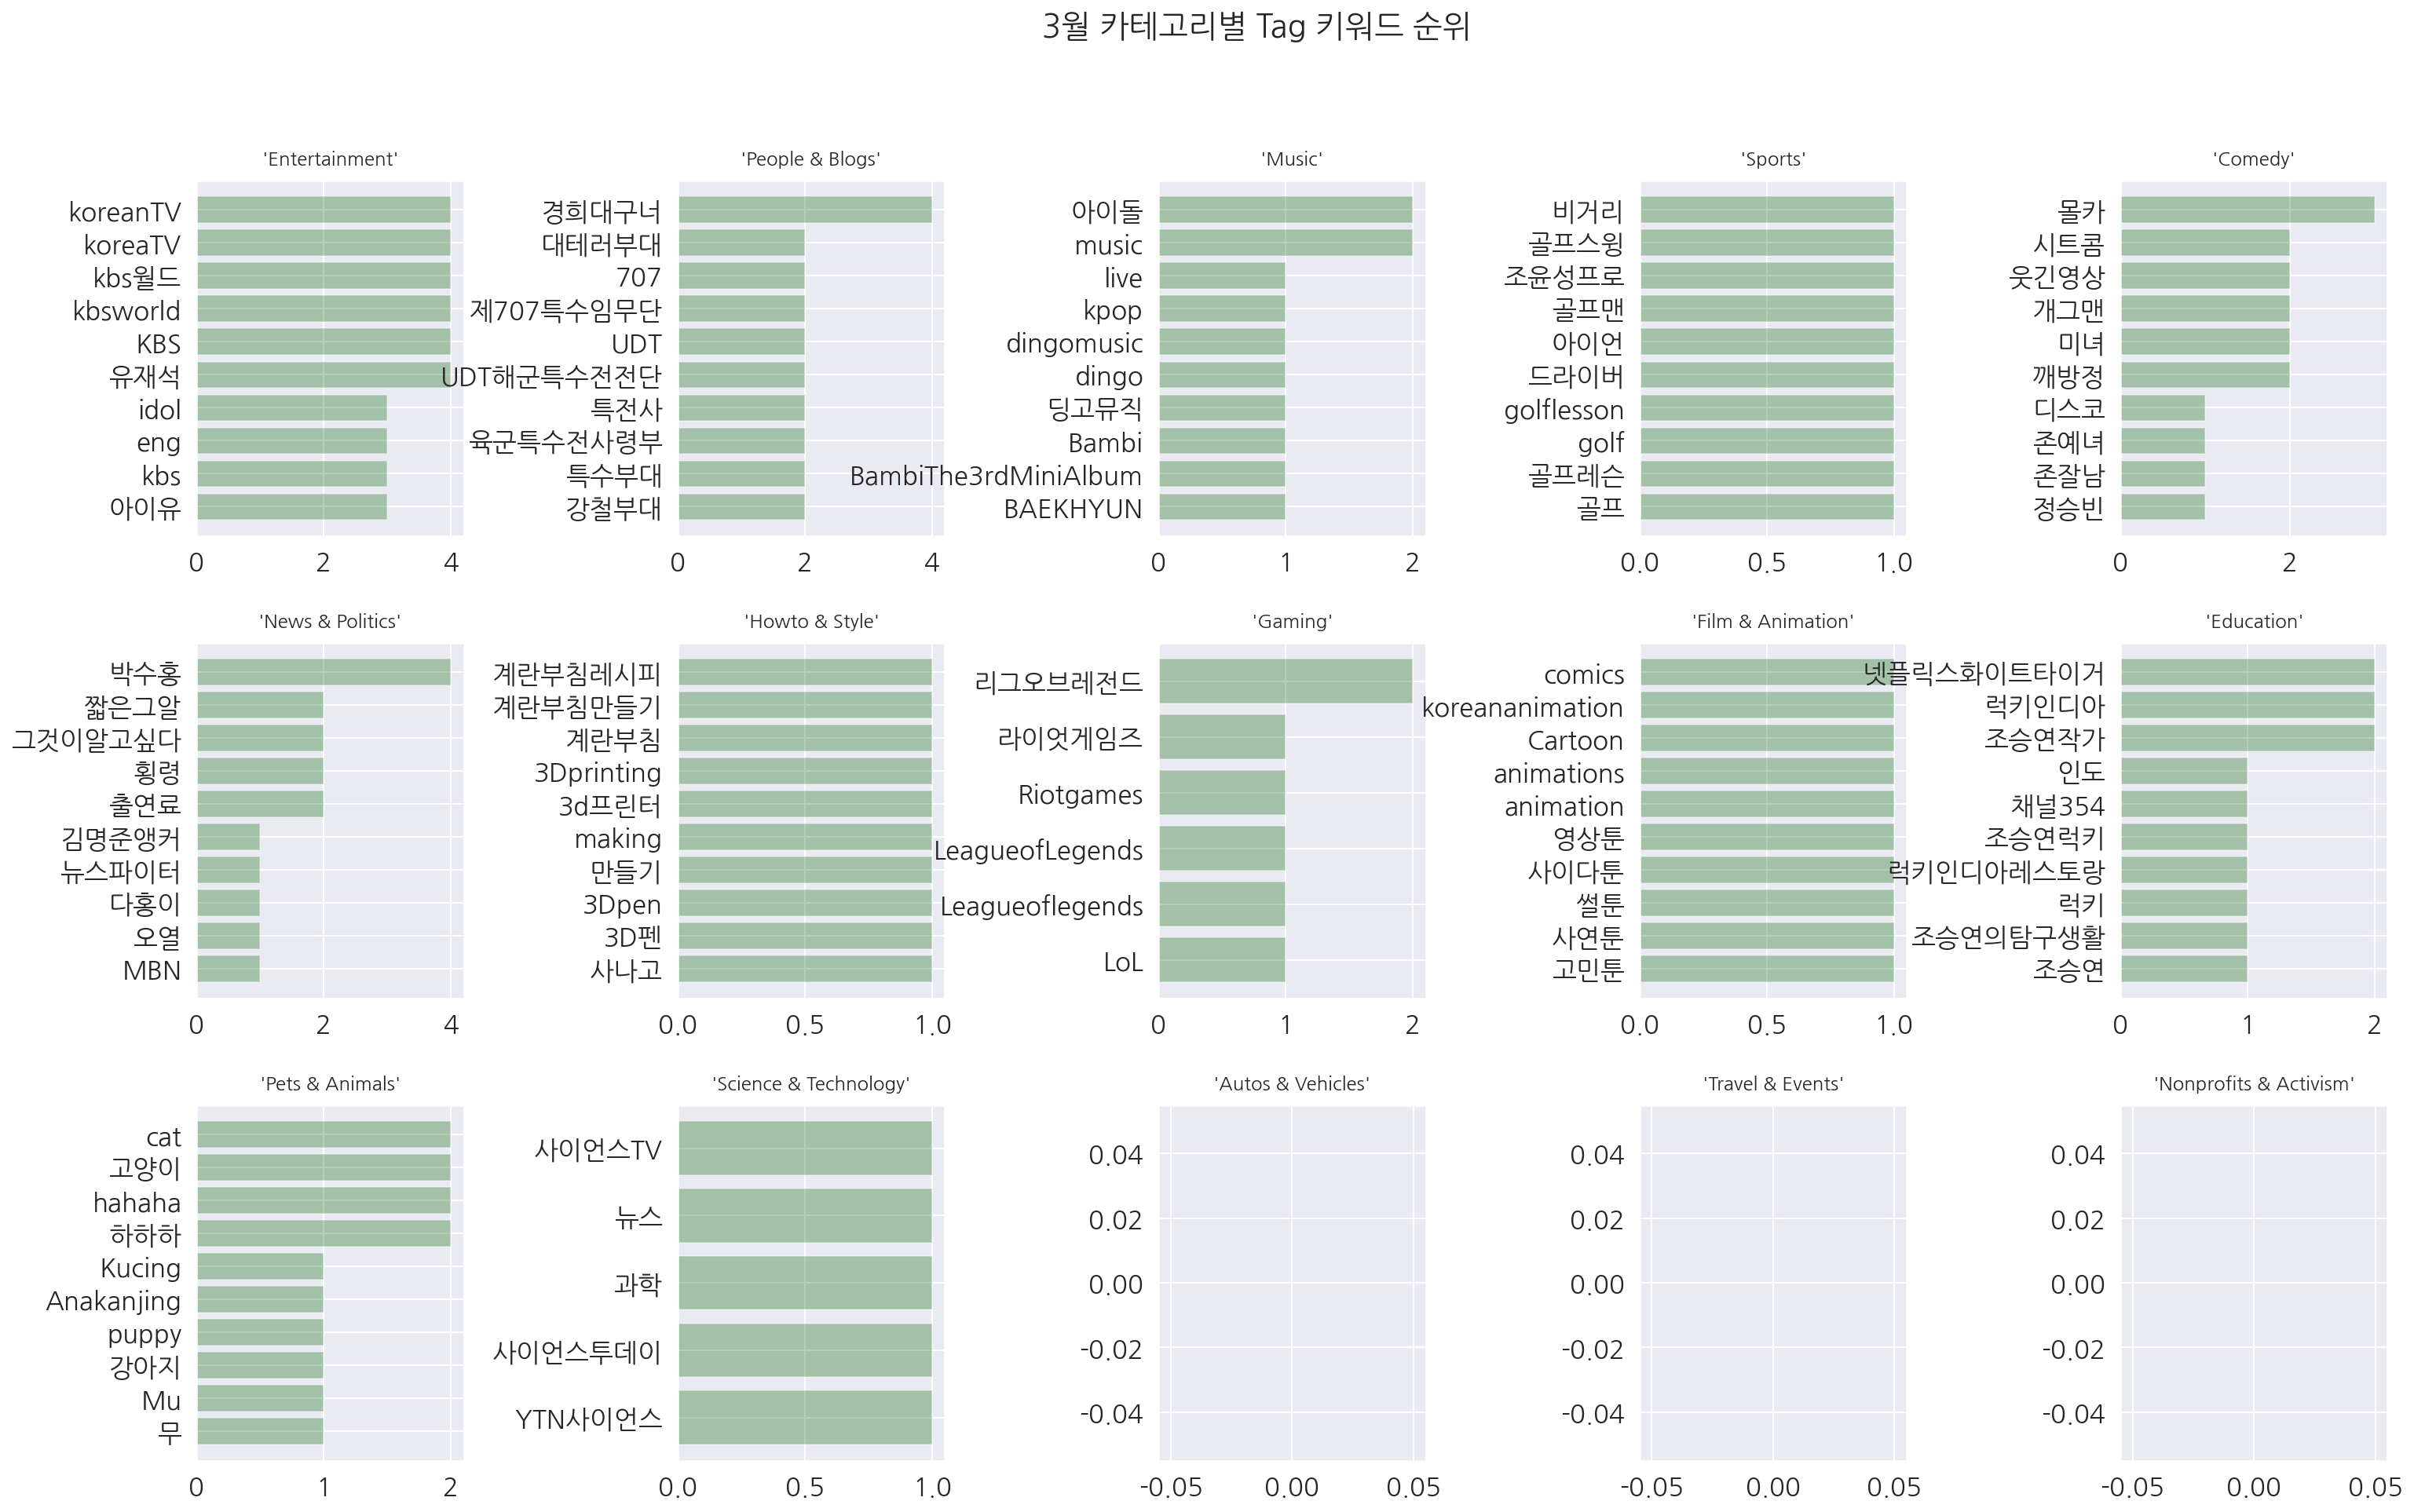

In [ ]:
# subplots 생성
f, axes = plt.subplots(3, 5)

# 격자 크기 설정
f.set_size_inches((25, 15))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.8, hspace = 0.3)

# figure 전체 제목
f.suptitle(f'3월 카테고리별 Tag 키워드 순위', fontsize = 20)

# [0, 1] 위치 막대 그래프


i=0
for j in range(3):
    for k in range(5):
        axes[j, k].barh(month3_wc_sort[i]['word'][:10], month3_wc_sort[i]['count'][:10], color = 'darkgreen', alpha = 0.3)
        axes[j, k].set_title(f"'{category[i]}'", fontsize = 12, pad=10)
        i+=1

plt.show()

### 4월

In [ ]:
tag4 = tag_df1[tag_df1['published_month']==4]
tag4

,published_month,category_name,tag_name1
6,4,Entertainment,"[와썹맨, 와썹맨2, wassupman, 스튜디오룰루랄라, studiolululal..."
10,4,People & Blogs,"[유트루, vlog, 한국일상, 유투버, Collab, Korean, 먹방, 가족,..."
17,4,Sports,"[골프, 골프레슨, 스윙, 골프스윙, 연예인, 연예인골프단, 연예인골프, 연얘인골프..."
18,4,Entertainment,"[피자, 치즈피자, 대만피자, 대만맛집, 대만야시장]"
32,4,Comedy,"[군대, 3인칭, 웹드라마, 슬폐, 폐급, 이등병, 일병, 하극상]"
...,...,...,...
2259,4,Music,"[MAMAMOO, 마마무, WheeIn, 휘인, Redd, 휘인Redd, 휘인wat..."
2260,4,News & Politics,"[호랑이, 중국, 백두산호랑이, 습격]"
2265,4,Entertainment,"[임영웅, 임영웅화보, 임영웅영상, fashion, fashionfilm, 인디안,..."
2271,4,Science & Technology,"[아이패드프로, 아이패드프로5, 아이패드프로5세대, 신형아이맥, 아이맥, iMac,..."


4월달 중에서 카테고리별로 구분하여, 태그 키워드의 등장순위를 매겨보겠습니다.

In [ ]:
month4_wc = category.copy()
month4_wc_sort = category.copy()

In [ ]:
# category_name에 따라 분류해서 태그의 통계적 정보가 담긴 데이터 프레임 반환
for i in range(len(category)):
  month4_wc[i] = word_count(tag4[tag4['category_name']==category[i]]['tag_name1'])  # 통계 데이터프레임 만들기
  month4_wc_sort[i] = month4_wc[i][:10].sort_values(by=['count'], ascending=True)  # barh를 만들기 위한 재정렬

In [ ]:
# 1위~10위까지 정렬
print(f'4월 {category[0]} 카테고리의 태그 키워드 순위')
print(f'총 {month4_wc[0].shape[0]}개의 단어 등장')
month4_wc[0][:10]

4월 Entertainment 카테고리의 태그 키워드 순위
총 3980개의 단어 등장


,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
20,예능,24,24,1.0,0.003547,0.003547,0.103896
30,먹방,22,22,2.0,0.003251,0.006798,0.095238
304,브레이브걸스,20,20,3.0,0.002956,0.009753,0.086580
295,롤린,19,19,4.0,0.002808,0.012561,0.082251
401,유재석,18,18,5.0,0.002660,0.015221,0.077922
433,놀면뭐하니,15,18,6.0,0.002660,0.017881,0.064935
297,쁘걸,17,17,7.0,0.002512,0.020393,0.073593
289,유나,17,17,8.0,0.002512,0.022905,0.073593
309,유정,16,16,9.0,0.002364,0.025270,0.069264
290,민영,16,16,10.0,0.002364,0.027634,0.069264


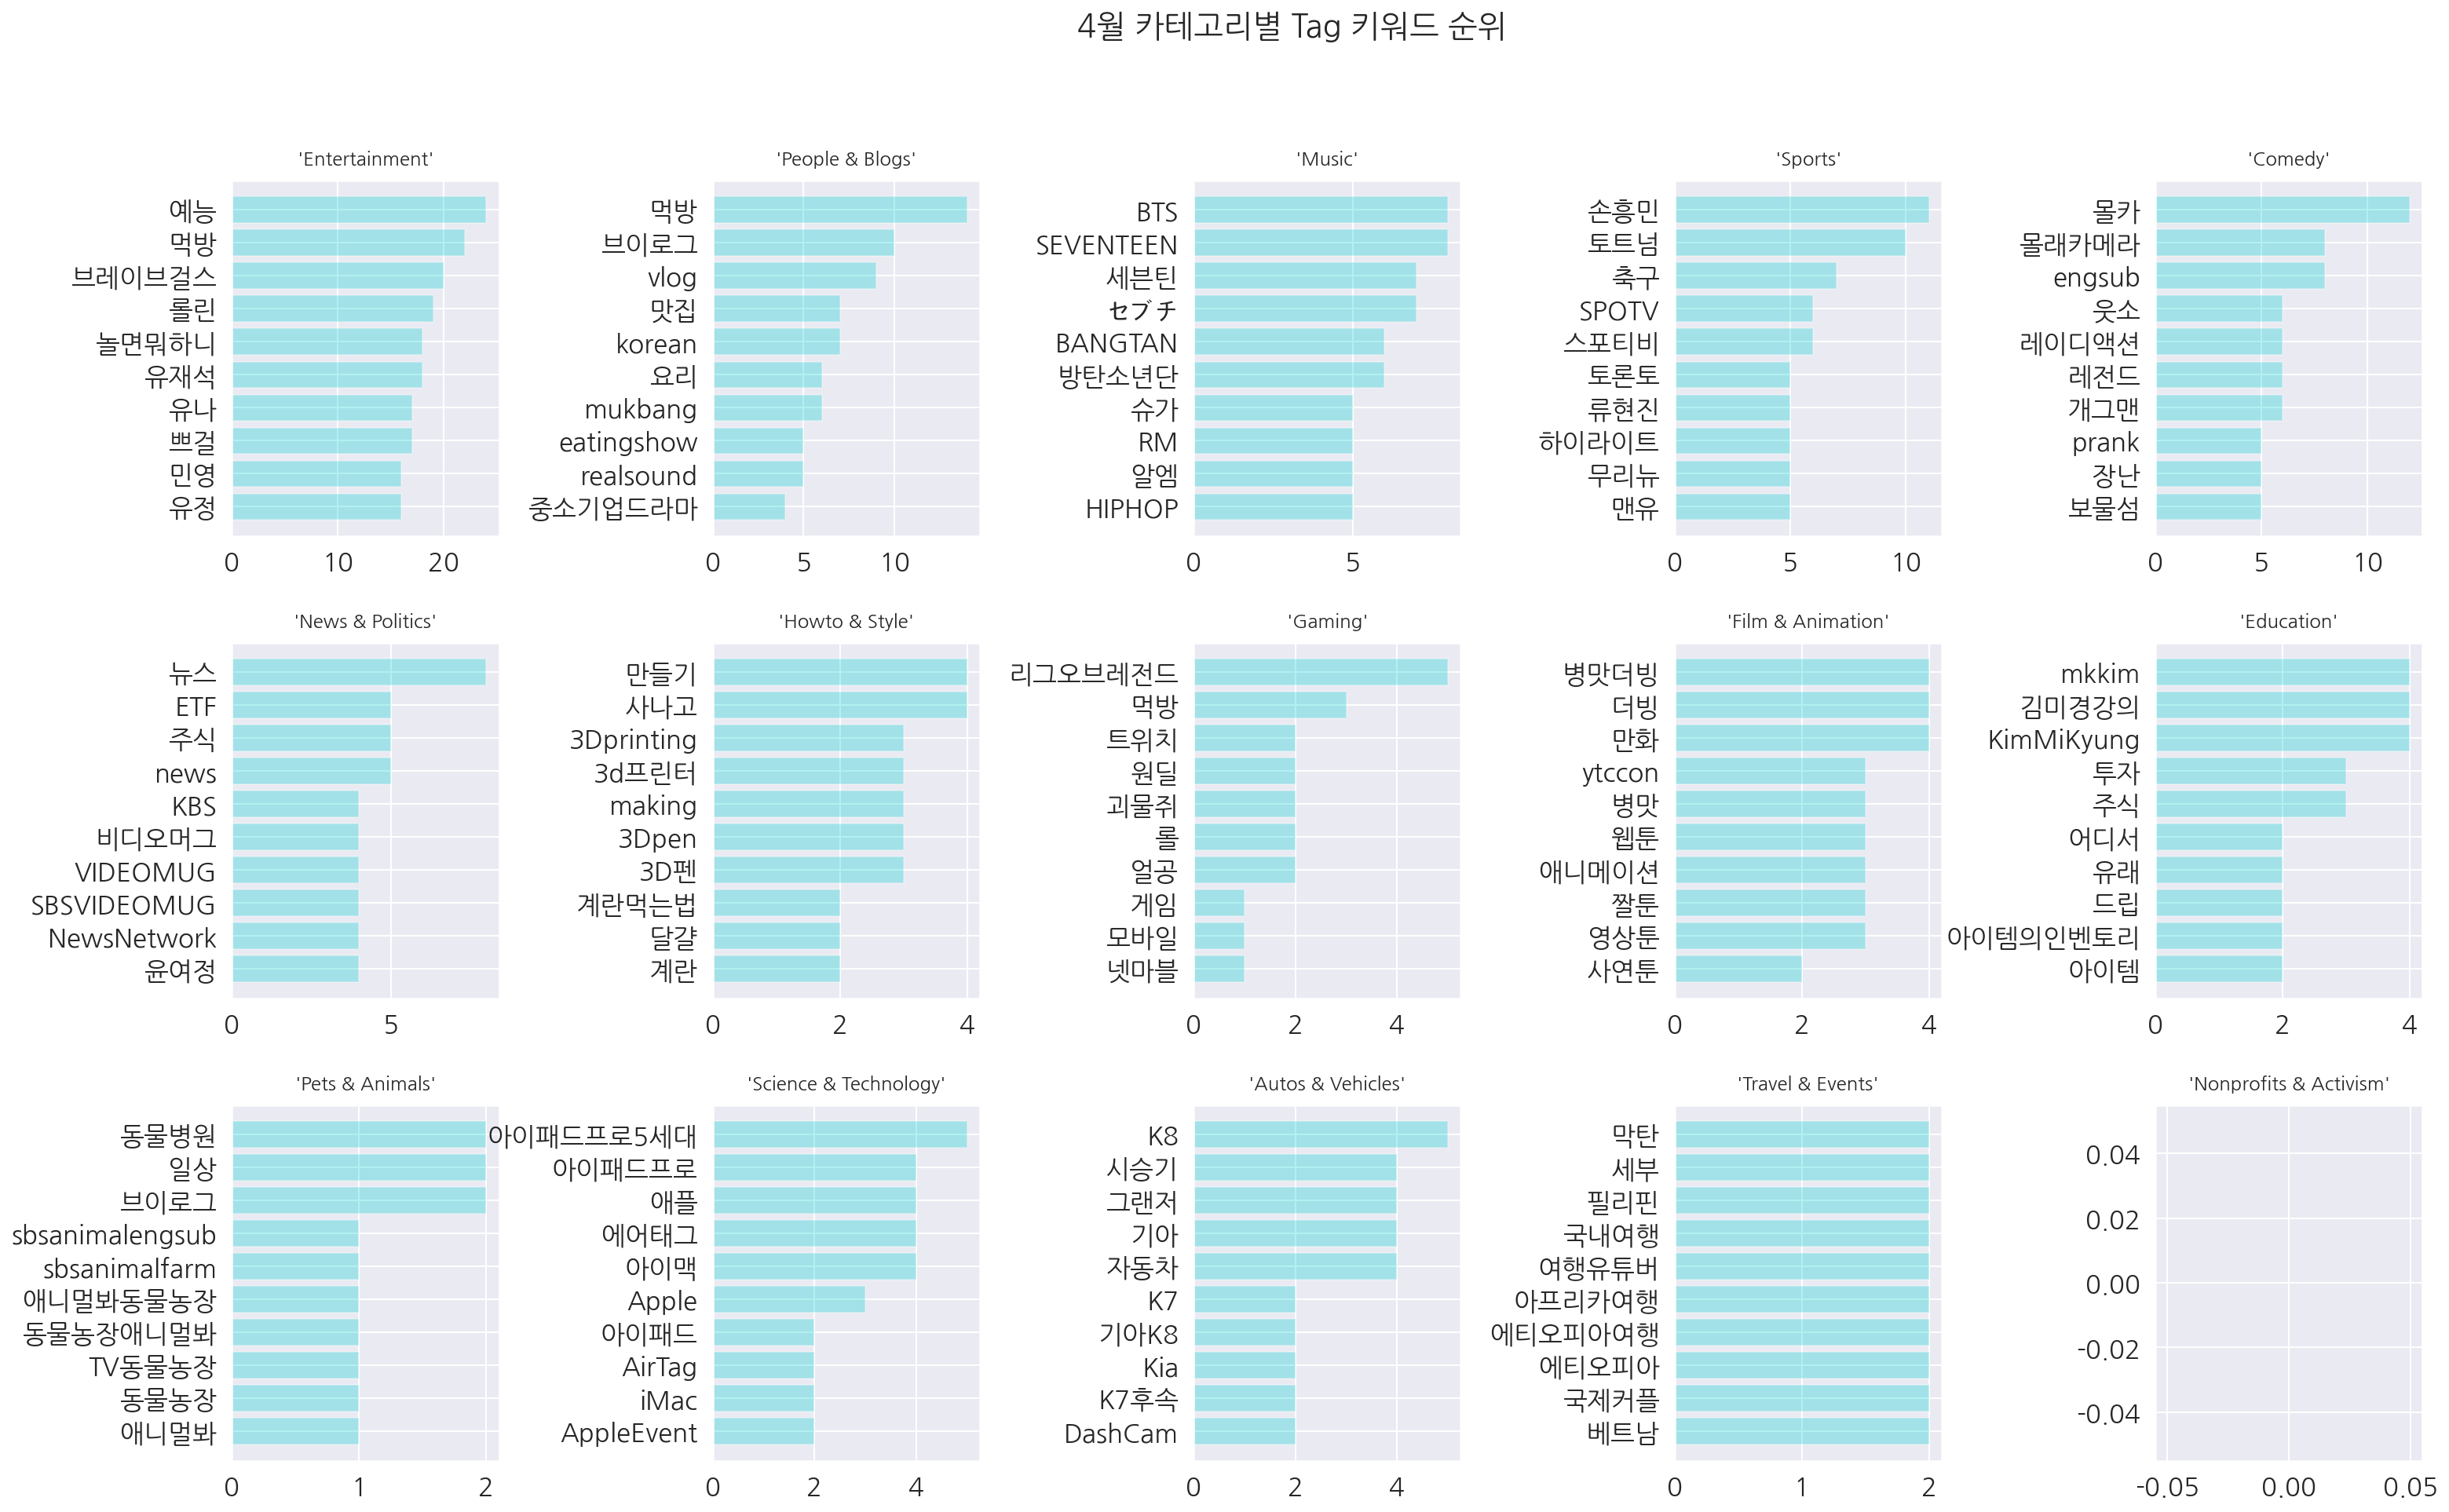

In [ ]:
# subplots 생성
f, axes = plt.subplots(3, 5)

# 격자 크기 설정
f.set_size_inches((25, 15))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.8, hspace = 0.3)

# figure 전체 제목
f.suptitle(f'4월 카테고리별 Tag 키워드 순위', fontsize = 20)

# [0, 1] 위치 막대 그래프


i=0
for j in range(3):
    for k in range(5):
        axes[j, k].barh(month4_wc_sort[i]['word'][:10], month4_wc_sort[i]['count'][:10], color = 'darkturquoise', alpha = 0.3)
        axes[j, k].set_title(f"'{category[i]}'", fontsize = 12, pad=10)
        i+=1

plt.show()

### 5월 

In [ ]:
tag5 = tag_df1[tag_df1['published_month']==5]
tag5

,published_month,category_name,tag_name1
12,5,Science & Technology,"[귀상어, 머리, 상어, 진화, 부력, 로렌치니기관]"
16,5,Entertainment,"[소개팅, 하트시그널, 프렌즈, 찐한친구, 김인호, 상해기, 현강림, 웅이, 아뜰리..."
19,5,Howto & Style,"[감자채전만들기, 감자채전만드는방법, 감자채전만드는법, 감자채전레시피, 감자채전황금..."
20,5,Entertainment,"[14f, 일사에프, 라마단, 로켓포, 요격미사일, 방사포, 미사일, 하마스, 보복공습]"
22,5,Entertainment,"[studiolululala, JTBC, 스튜디오룰루랄라, 룰루랄라, 워크맨, 직업..."
...,...,...,...
2247,5,Entertainment,"[빅민, 빅민타임, 일상, 집들이, 빅민집들이, 이사, 태경, 쁘허, vlog, 브..."
2248,5,People & Blogs,"[ASMR, 먹방, mukbang, 코이티비, JOKBAL]"
2257,5,Entertainment,"[인생, 무당, 죽음, 성적, 돈벼락, 신내림, 무속, 무속인, 만신, 점집, 사주..."
2268,5,Sports,"[mlb, 메이저리그, 류현진, 조미예, 토론토, 블루제이스, 토론토블루제이스, 조..."


5월달 중에서 카테고리별로 구분하여, 태그 키워드의 등장순위를 매겨보겠습니다.

In [ ]:
month5_wc = category.copy()
month5_wc_sort = category.copy()

In [ ]:
# category_name에 따라 분류해서 태그의 통계적 정보가 담긴 데이터 프레임 반환
for i in range(len(category)):
  month5_wc[i] = word_count(tag5[tag5['category_name']==category[i]]['tag_name1'])  # 통계 데이터프레임 만들기
  month5_wc_sort[i] = month5_wc[i][:10].sort_values(by=['count'], ascending=True)  # barh를 만들기 위한 재정렬

In [ ]:
# 1위~10위까지 정렬
print(f'5월 {category[0]} 카테고리의 태그 키워드 순위')
print(f'총 {month5_wc[0].shape[0]}개의 단어 등장')
month5_wc[0][:10]

5월 Entertainment 카테고리의 태그 키워드 순위
총 3637개의 단어 등장


,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
801,PO,11,20,1.0,0.003279,0.003279,0.049327
450,tvN,19,19,2.0,0.003115,0.006394,0.085202
96,먹방,16,16,3.0,0.002623,0.009018,0.071749
811,방탄소년단,14,14,4.0,0.002295,0.011313,0.062780
638,놀면뭐하니,11,12,5.0,0.001968,0.013281,0.049327
813,피오,12,12,6.0,0.001968,0.015248,0.053812
64,패션,11,11,7.0,0.001804,0.017052,0.049327
706,라면,11,11,8.0,0.001804,0.018856,0.049327
773,이수근,11,11,9.0,0.001804,0.020659,0.049327
296,BTS,10,10,10.0,0.001640,0.022299,0.044843


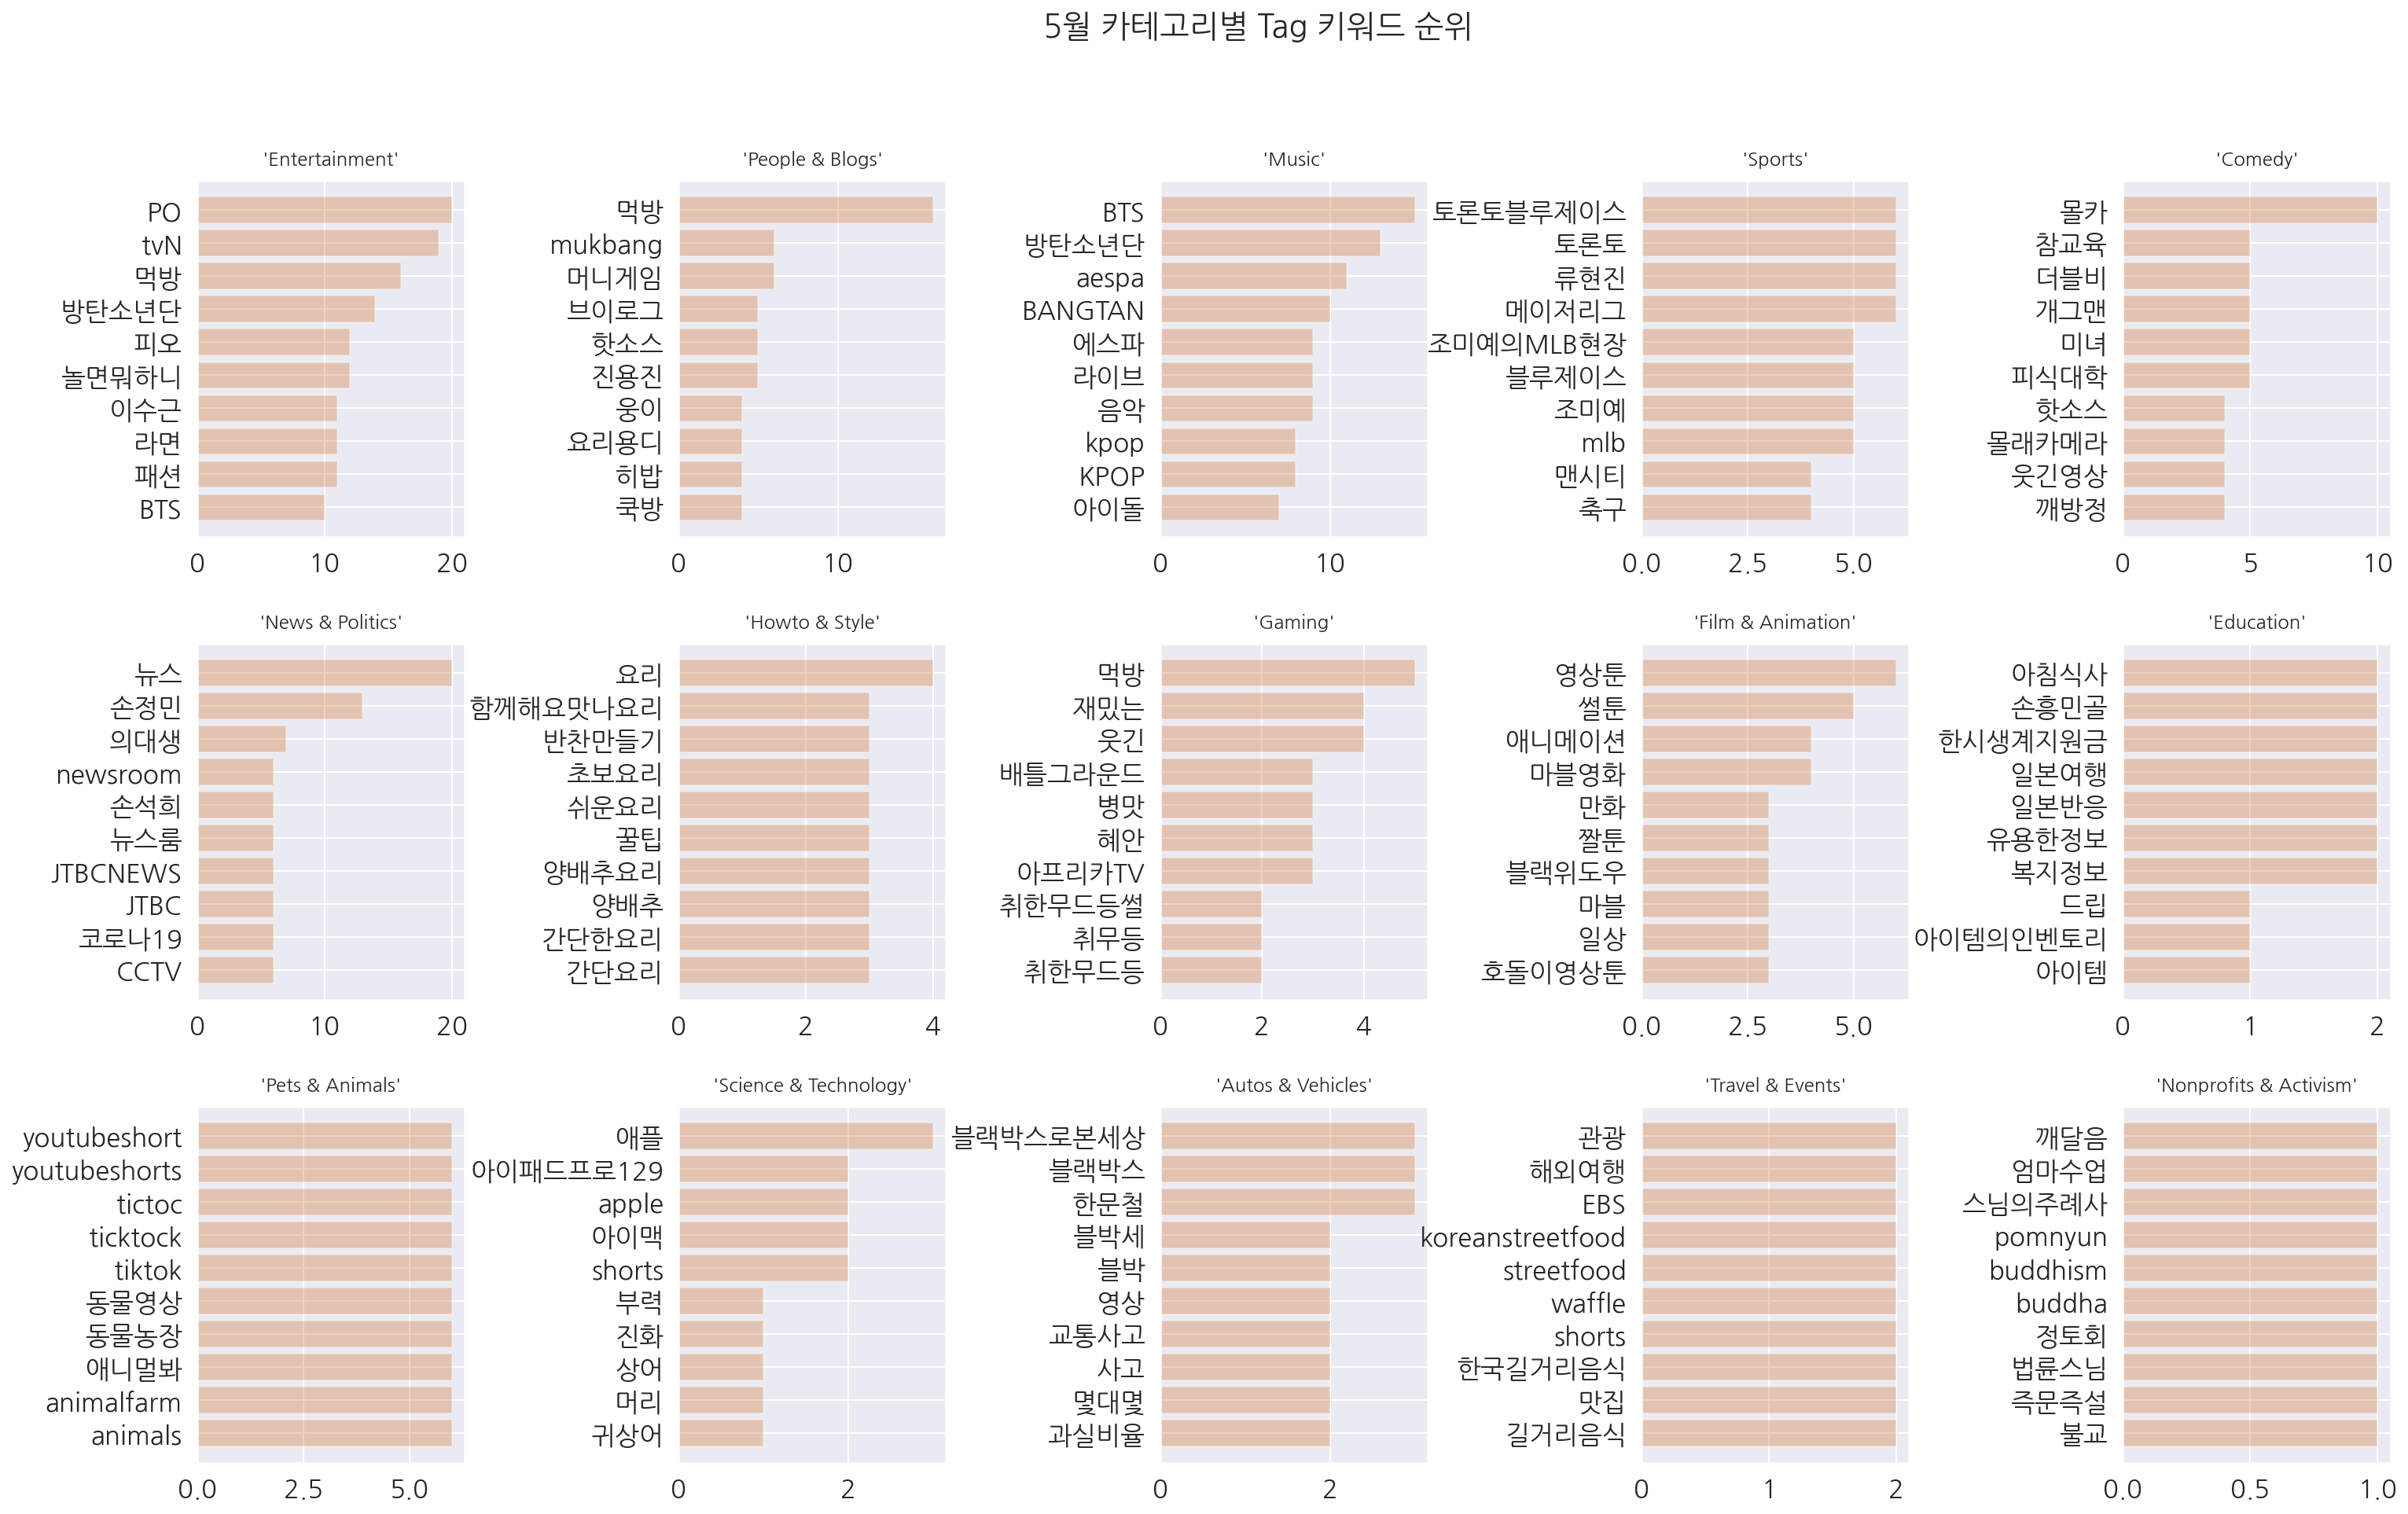

In [ ]:
# subplots 생성
f, axes = plt.subplots(3, 5)

# 격자 크기 설정
f.set_size_inches((25, 15))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.8, hspace = 0.3)

# figure 전체 제목
f.suptitle(f'5월 카테고리별 Tag 키워드 순위', fontsize = 20)

# [0, 1] 위치 막대 그래프


i=0
for j in range(3):
    for k in range(5):
        axes[j, k].barh(month5_wc_sort[i]['word'][:10], month5_wc_sort[i]['count'][:10], color = 'chocolate', alpha = 0.3)
        axes[j, k].set_title(f"'{category[i]}'", fontsize = 12, pad=10)
        i+=1

plt.show()

### 6월

In [ ]:
tag6 = tag_df1[tag_df1['published_month']==6]
tag6

,published_month,category_name,tag_name1
1,6,Entertainment,"[치킨불냉면, 치킨, 불냉면, 냉면]"
2,6,Sports,"[NewsNetwork, SBSSPORTSMUG, SPORTSMUG, 스포츠머그, ..."
4,6,Music,"[JYPEntertainment, JYP, 2PM, 투피엠, 2PMTeaserVid..."
9,6,Entertainment,"[Ashin, AshinoftheNorth좀비, JunJiHyun, Kingdom,..."
11,6,People & Blogs,"[이지혜, 밉지않은관종언니, 밉관, 큰태리, VLOG, 연예인엄마, 태리, 작은태리..."
...,...,...,...
2262,6,People & Blogs,"[양파요리, 양파레시피, 간단요리, 간단한요리, 양파맛있게먹는방법, 양파계란볶음만들..."
2263,6,Travel & Events,"[EBS, EBSdocumentary, EBS다큐멘터리, 다큐, docu]"
2266,6,People & Blogs,"[ytccon, hamzy, mukbang, vlog, trip, travel, k..."
2267,6,People & Blogs,"[카푸어현실, 쿠페형suv, suv추천, 연비, x6유지비, 20대차, 사회초년생차..."


6월달 중에서 카테고리별로 구분하여, 태그 키워드의 등장순위를 매겨보겠습니다.

In [ ]:
month6_wc = category.copy()
month6_wc_sort = category.copy()

In [ ]:
# category_name에 따라 분류해서 태그의 통계적 정보가 담긴 데이터 프레임 반환
for i in range(len(category)):
  month6_wc[i] = word_count(tag6[tag6['category_name']==category[i]]['tag_name1'])  # 통계 데이터프레임 만들기
  month6_wc_sort[i] = month6_wc[i][:10].sort_values(by=['count'], ascending=True)  # barh를 만들기 위한 재정렬

In [ ]:
# 1위~10위까지 정렬
print(f'6월 {category[0]} 카테고리의 태그 키워드 순위')
print(f'총 {month6_wc[0].shape[0]}개의 단어 등장')
month6_wc[0][:10]

6월 Entertainment 카테고리의 태그 키워드 순위
총 3271개의 단어 등장


,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
538,먹방,27,28,1.0,0.005482,0.005482,0.139896
197,예능,20,20,2.0,0.003915,0.009397,0.103627
127,레전드,15,15,3.0,0.002937,0.012334,0.077720
151,SBS,15,15,4.0,0.002937,0.015270,0.077720
47,kpop,12,13,5.0,0.002545,0.017815,0.062176
280,유재석,13,13,6.0,0.002545,0.020360,0.067358
1171,개그,11,11,7.0,0.002153,0.022514,0.056995
26,아이돌,10,10,8.0,0.001958,0.024471,0.051813
301,하하,10,10,9.0,0.001958,0.026429,0.051813
579,mukbang,9,10,10.0,0.001958,0.028387,0.046632


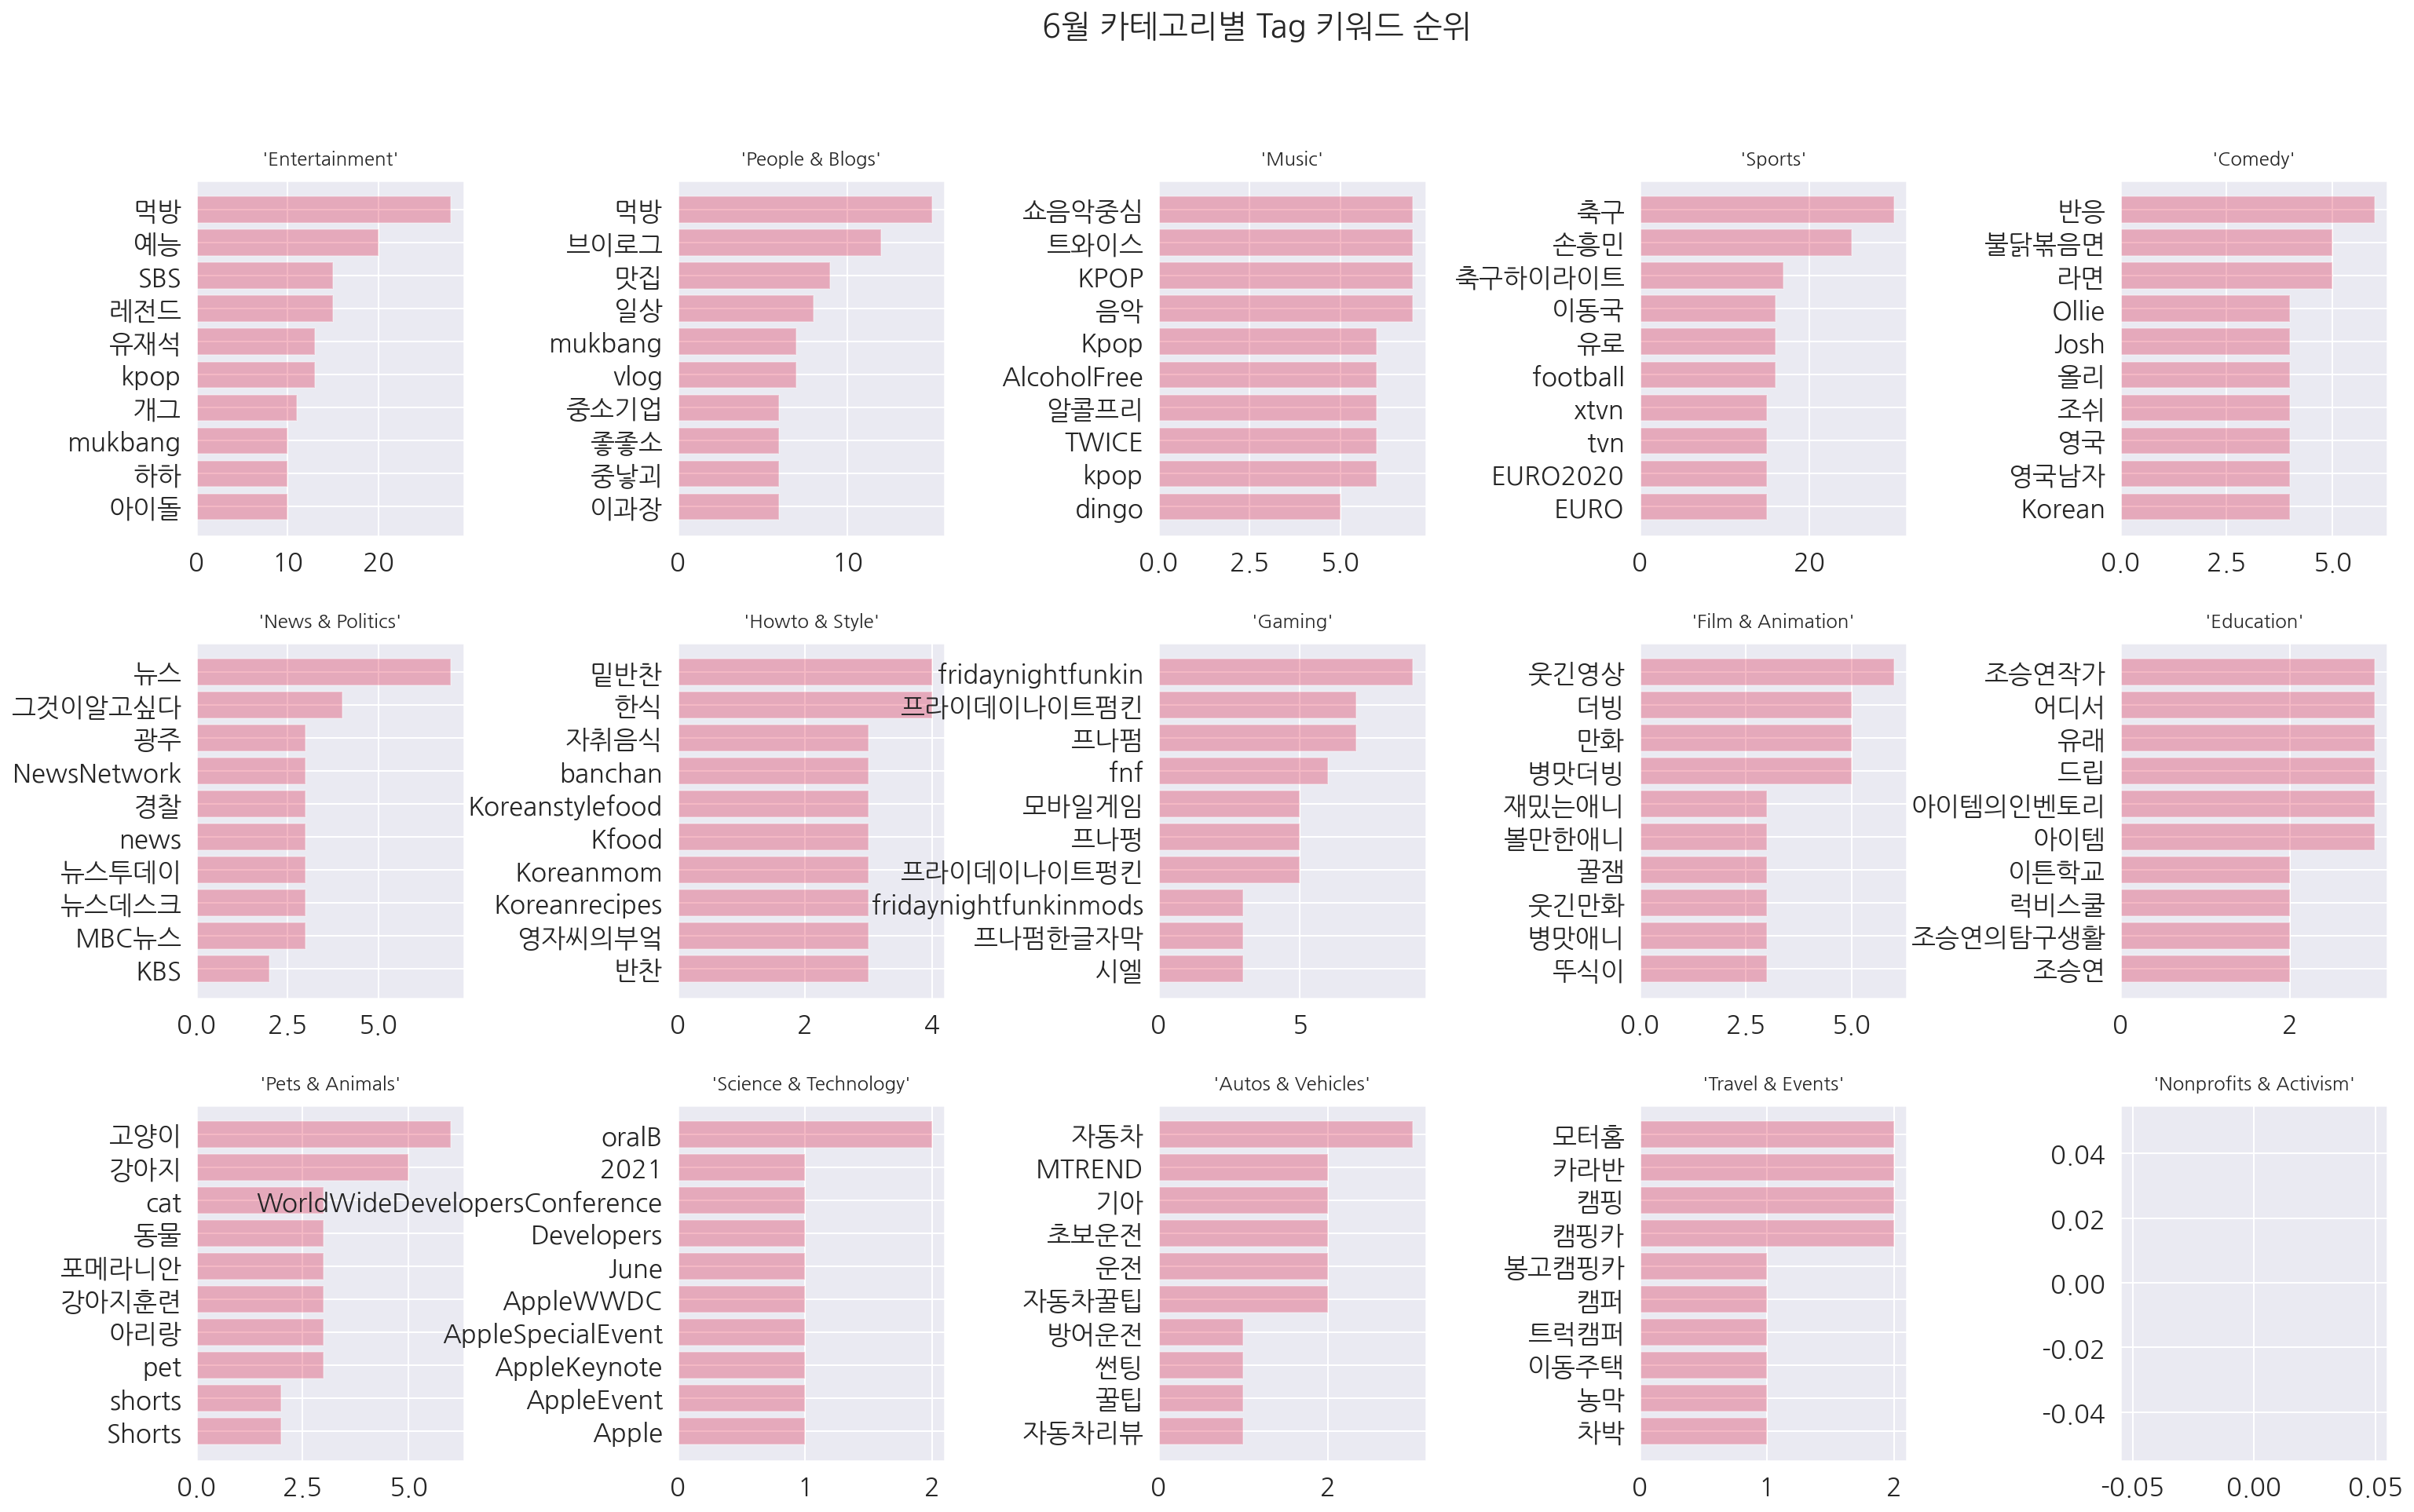

In [ ]:
# subplots 생성
f, axes = plt.subplots(3, 5)

# 격자 크기 설정
f.set_size_inches((25, 15))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.8, hspace = 0.3)

# figure 전체 제목
f.suptitle(f'6월 카테고리별 Tag 키워드 순위', fontsize = 20)

# [0, 1] 위치 막대 그래프


i=0
for j in range(3):
    for k in range(5):
        axes[j, k].barh(month6_wc_sort[i]['word'][:10], month6_wc_sort[i]['count'][:10], color = 'crimson', alpha = 0.3)
        axes[j, k].set_title(f"'{category[i]}'", fontsize = 12, pad=10)
        i+=1

plt.show()

### 7월

In [ ]:
tag7 = tag_df1[tag_df1['published_month']==7]
tag7

,published_month,category_name,tag_name1
0,7,Entertainment,"[SiriusXM, SiriusXM, Sirius, SXM, BIGHIT, 빅히트,..."
3,7,Sports,"[이천수, 심판도전기, 축구심판]"
5,7,Music,"[딩고뮤직, dingo, dingomusic, music, kpop, live, 멜..."
7,7,Entertainment,"[엠넷, mnet, kpop, kpop, 엠카운트다운, 엠카, mcountdown,..."
8,7,Entertainment,"[올림픽, 도쿄올림픽, 여자배구, 김연경, 식빵언니, 식빵, 김희진, 양효진, 박정..."
...,...,...,...
2255,7,Entertainment,"[씨랩, CLAB, 소셜, 리액션, Youtubereaction, react, kp..."
2256,7,Sports,"[MBC, 스포츠, 장혜진, 김정근, 안산, 짱콩, 김제덕, 금메달, 양궁, 양궁혼성]"
2261,7,Autos & Vehicles,"[맨인블박, 블랙박스로본세상, 블랙박스로본세상모닝와이드, 맨인블랙박스, 모닝와이드,..."
2264,7,Music,"[기획영상, 스페셜영상, 슉끌립, 하이라이트, 다비팀, 박다울팀, Can39;tFe..."


7월달 중에서 카테고리별로 구분하여, 태그 키워드의 등장순위를 매겨보겠습니다.

In [ ]:
month7_wc = category.copy()
month7_wc_sort = category.copy()

In [ ]:
# category_name에 따라 분류해서 태그의 통계적 정보가 담긴 데이터 프레임 반환
for i in range(len(category)):
  month7_wc[i] = word_count(tag7[tag7['category_name']==category[i]]['tag_name1'])  # 통계 데이터프레임 만들기
  month7_wc_sort[i] = month7_wc[i][:10].sort_values(by=['count'], ascending=True)  # barh를 만들기 위한 재정렬

In [ ]:
# 1위~10위까지 정렬
print(f'7월 {category[0]} 카테고리의 태그 키워드 순위')
print(f'총 {month7_wc[0].shape[0]}개의 단어 등장')
month7_wc[0][:10]

7월 Entertainment 카테고리의 태그 키워드 순위
총 3118개의 단어 등장


,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
125,유재석,19,19,1.0,0.004150,0.004150,0.106145
137,예능,17,17,2.0,0.003713,0.007864,0.094972
437,SBS,14,14,3.0,0.003058,0.010922,0.078212
1083,런닝맨,9,13,4.0,0.002840,0.013761,0.050279
36,kpop,10,12,5.0,0.002621,0.016383,0.055866
75,먹방,12,12,6.0,0.002621,0.019004,0.067039
731,레전드,11,11,7.0,0.002403,0.021407,0.061453
1186,하하,10,10,8.0,0.002184,0.023591,0.055866
228,tvN,9,9,9.0,0.001966,0.025557,0.050279
118,놀면뭐하니,8,8,10.0,0.001747,0.027304,0.044693


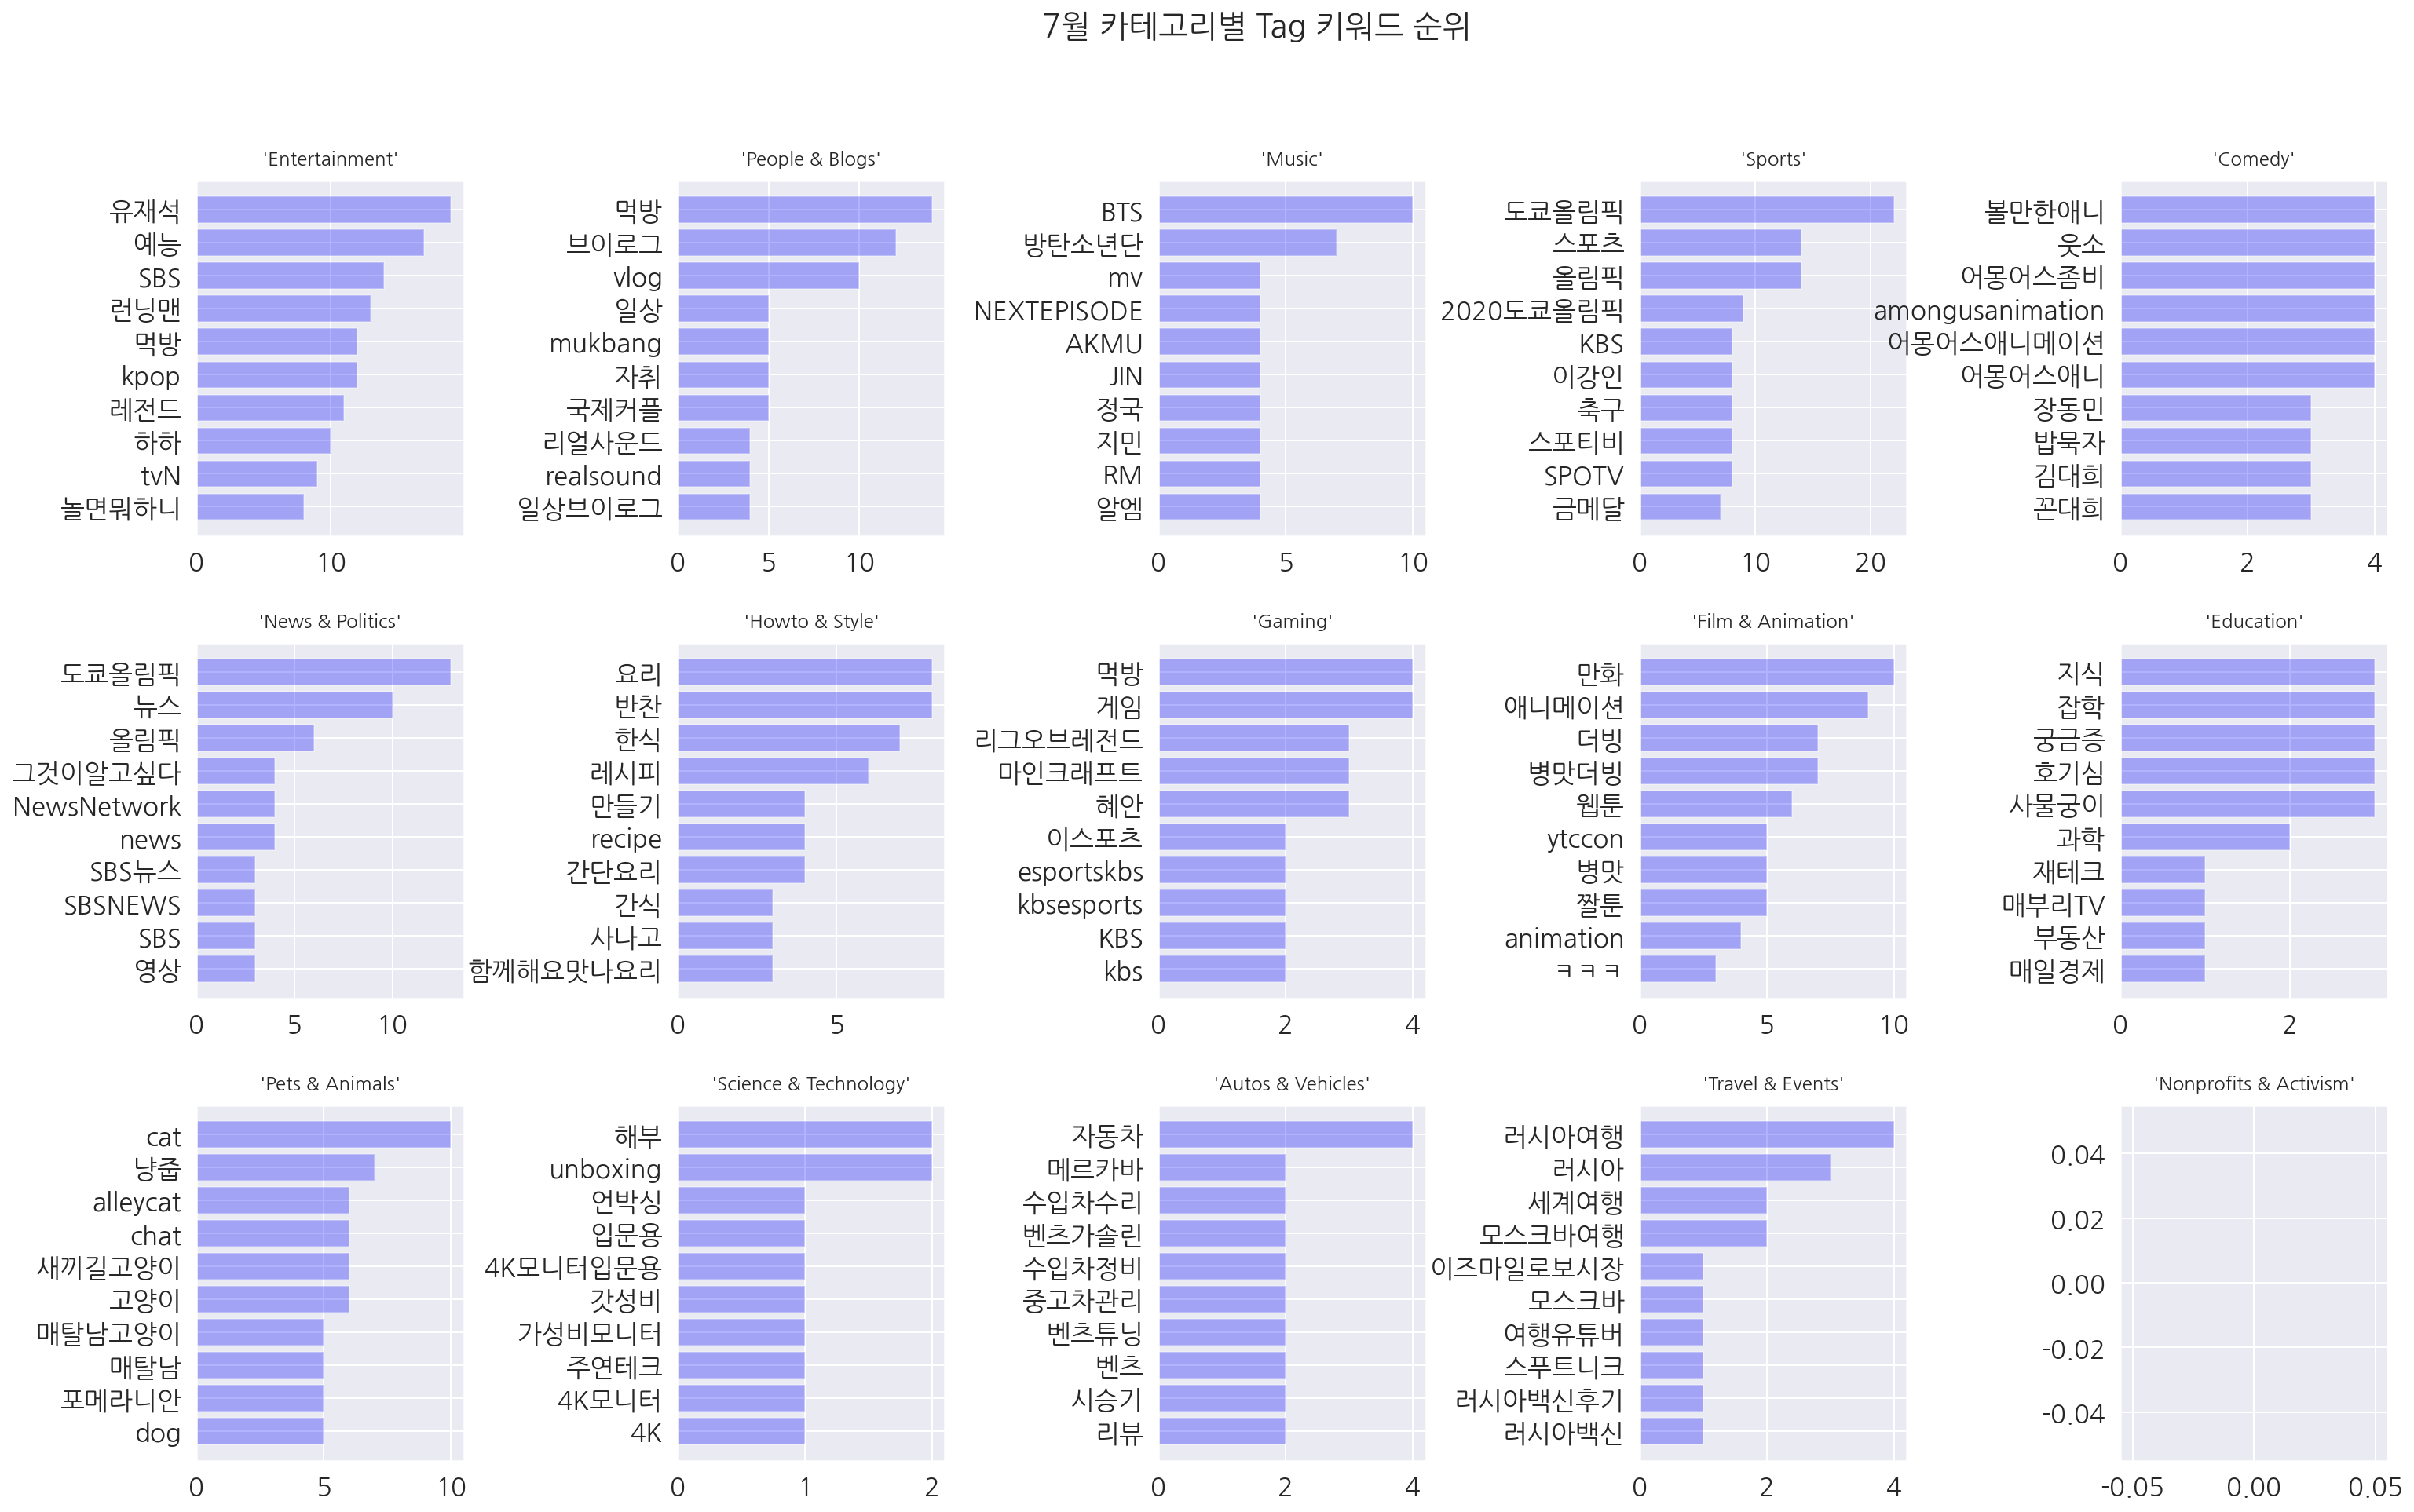

In [ ]:
# subplots 생성
f, axes = plt.subplots(3, 5)

# 격자 크기 설정
f.set_size_inches((25, 15))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.8, hspace = 0.3)

# figure 전체 제목
f.suptitle(f'7월 카테고리별 Tag 키워드 순위', fontsize = 20)

# [0, 1] 위치 막대 그래프


i=0
for j in range(3):
    for k in range(5):
        axes[j, k].barh(month7_wc_sort[i]['word'][:10], month7_wc_sort[i]['count'][:10], color = 'blue', alpha = 0.3)
        axes[j, k].set_title(f"'{category[i]}'", fontsize = 12, pad=10)
        i+=1

plt.show()